<a href="https://colab.research.google.com/github/Naman09746/Supervised-Machine-Learning/blob/main/Regression/customer_churning_prediction-main/telecom_customer_churning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [49]:
data = pd.read_csv('churn.csv')

data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [50]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
# Check if 'customerID' is in the columns before dropping
if 'customerID' in data.columns:
    data.drop('customerID',axis='columns',inplace=True)
    print("Column 'customerID' dropped successfully.")
else:
    print("Column 'customerID' not found in the DataFrame.")



Column 'customerID' dropped successfully.


In [52]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [54]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [55]:
data.shape

(7043, 20)

In [56]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [57]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [58]:
df1=data[data.TotalCharges!=' ']
df1.shape

(7032, 20)

In [59]:

df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [60]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-60-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [61]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [62]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


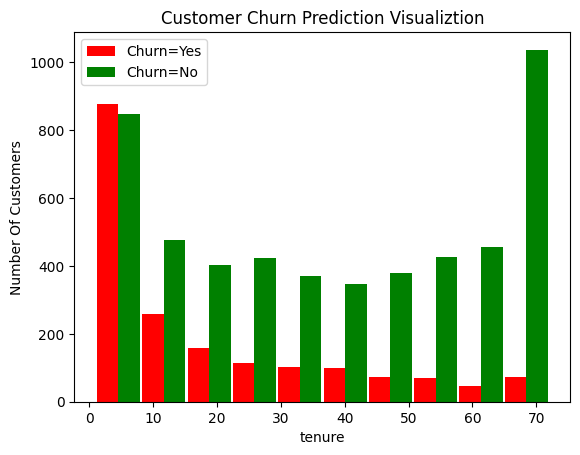

In [63]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()


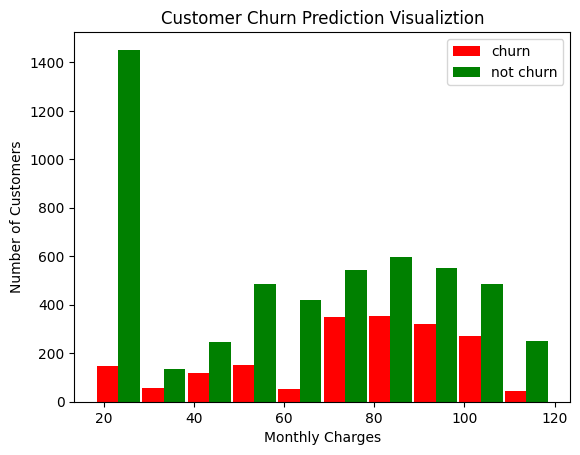

In [64]:
monthly_charges_churn_no= df1[df1.Churn=='No'].MonthlyCharges
monthly_charges_churn_yes= df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149,88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 84, 39, 100, 92, 110]

plt.hist([monthly_charges_churn_yes,monthly_charges_churn_no], rwidth=0.95, color=['red','green'],label=['churn','not churn'])
plt.legend()
plt.show()

In [65]:
def print_unique_values(data):
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column}: {data[column].unique()}')



In [66]:
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [67]:
type(df1)

pandas.core.frame.DataFrame

In [68]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
# Restore the original print function
# del print

def print_unique_strings(df):
    for col in df.select_dtypes(include=['object']):  # Filter string columns
        print(f'{col}: {df[col].unique()}')  # Use the built-in print

print_unique_strings(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [70]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-70-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-70-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [71]:
print_unique_strings(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [72]:
bool_columns= ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in bool_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-72-92e4ef75fcad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [73]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [74]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-74-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [75]:
df1.shape

(7032, 20)

In [76]:
df2=pd.get_dummies(df1,columns=['InternetService','Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [77]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [78]:
df2.shape #removed ADDED 10(27)

(7032, 27)

In [79]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [80]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')  #Now all values are between range 1 and 0

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [81]:
df2.sample(10 )

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6043,0,0,0,0,0.028169,0,0,0,0,1,...,True,False,False,True,False,False,False,False,False,True
2434,1,0,1,1,0.028169,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
1140,1,0,0,1,0.169014,1,1,1,1,1,...,True,False,False,False,False,True,False,True,False,False
5845,1,0,0,0,0.028169,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
836,0,0,1,1,0.859155,1,0,1,0,1,...,True,False,False,False,True,False,False,True,False,False
4904,1,0,0,0,0.450704,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False
6687,1,1,1,0,0.014085,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
2804,0,0,1,0,0.112676,0,0,0,0,0,...,True,False,False,False,True,False,True,False,False,False
6018,0,0,0,0,0.450704,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
5277,1,0,0,0,0.070423,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [82]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# x = df2.drop('Churn', axis='columns').astype('float32')
# y = df2['Churn'].astype('float32')

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# # Logistic Regression
# log_reg_model = LogisticRegression()
# log_reg_model.fit(x_train, y_train)
# y_pred_log_reg = log_reg_model.predict(x_test)
# y_pred_prob_log_reg = log_reg_model.predict_proba(x_test)[:, 1]

# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
# print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the features and target
x = df2.drop('Churn', axis='columns').astype('float32')
y = df2['Churn'].astype('float32')

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.01),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Store model performance
results = {}

# Evaluate each model using cross-validation
for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name} Accuracy: {scores.mean():.4f}")

# Identify the best model
best_model_name = max(results, key=results.get)
best_model_score = results[best_model_name]
print(f"\nBest Model: {best_model_name} with an accuracy of {best_model_score:.4f}")

# Retrain the best model on the full training set
best_model = models[best_model_name]
best_model.fit(x_train, y_train)

# Predict on the test set
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)[:, 1]

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_model_name} Accuracy on Test Set: {accuracy:.4f}")

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.8028
Evaluating Random Forest...
Random Forest Accuracy: 0.7898
Evaluating Gradient Boosting...
Gradient Boosting Accuracy: 0.7692
Evaluating Support Vector Machine...
Support Vector Machine Accuracy: 0.7971
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.7646

Best Model: Logistic Regression with an accuracy of 0.8028
Logistic Regression Accuracy on Test Set: 0.7946


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       999
         1.0       0.68      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.79      0.79      0.79      1407



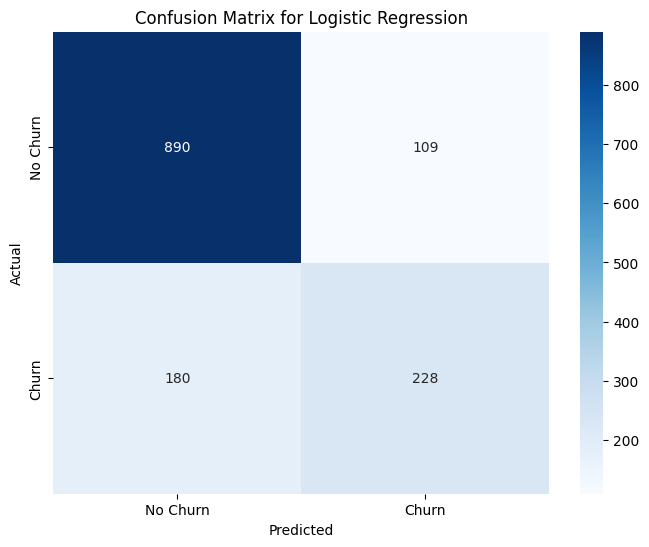

In [110]:


# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

In [101]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Prepare the features and target
# x = df2.drop('Churn', axis='columns').astype('float32')
# y = df2['Churn'].astype('float32')

# # Split the data
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# # Define models to test
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Support Vector Machine': SVC(probability=True),
#     'K-Nearest Neighbors': KNeighborsClassifier()
# }

# # Store model performance
# results = {}

# # Evaluate each model using cross-validation
# for name, model in models.items():
#     print(f"Evaluating {name}...")
#     scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
#     results[name] = scores.mean()
#     print(f"{name} Accuracy: {scores.mean():.4f}")

# # Identify the best model
# best_model_name = max(results, key=results.get)
# best_model_score = results[best_model_name]
# print(f"\nBest Model: {best_model_name} with an accuracy of {best_model_score:.4f}")

# # Retrain the best model on the full training set
# best_model = models[best_model_name]
# best_model.fit(x_train, y_train)

# # Predict on the test set
# y_pred = best_model.predict(x_test)
# y_pred_prob = best_model.predict_proba(x_test)[:, 1]

# # Evaluate the best model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"{best_model_name} Accuracy on Test Set: {accuracy:.4f}")

# # Classification Report
# class_report = classification_report(y_test, y_pred)
# print(f"Classification Report:\n{class_report}")

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title(f'Confusion Matrix for {best_model_name}')
# plt.show()


In [85]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# # Define models to test
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Support Vector Machine': SVC(probability=True),
#     'K-Nearest Neighbors': KNeighborsClassifier()
# }

# # Store model performance
# results = {}

# # Evaluate each model using cross-validation
# for name, model in models.items():
#     print(f"Evaluating {name}...")
#     scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')  # You can use other metrics if needed
#     results[name] = scores.mean()
#     print(f"{name} Accuracy: {scores.mean():.4f}")

# # Identify the best model
# best_model_name = max(results, key=results.get)
# best_model_score = results[best_model_name]
# print(f"\nBest Model: {best_model_name} with an accuracy of {best_model_score:.4f}")


In [86]:
# # Initialize and train the Gradient Boosting model
# gb_model = GradientBoostingClassifier()
# gb_model.fit(x_train, y_train)

# # Make predictions
# y_pred_gb = gb_model.predict(x_test)
# y_pred_prob_gb = gb_model.predict_proba(x_test)[:, 1]

In [87]:
# # Accuracy
# accuracy = accuracy_score(y_test, y_pred_gb)
# print("Gradient Boosting Accuracy:", accuracy)

In [88]:
# # Classification Report
# class_report = classification_report(y_test, y_pred_gb)
# print("Classification Report:\n", class_report)

In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


In [112]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score for {best_model_name}: {roc_auc:.4f}")

ROC-AUC Score for Logistic Regression: 0.8412


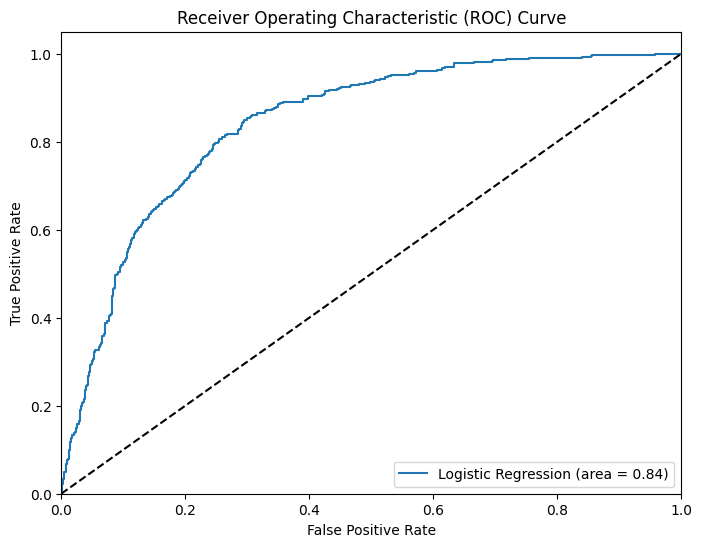

In [113]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()